<a href="https://colab.research.google.com/github/pkams/coursera_TensorFlowSpecialization/blob/master/Modulo3_2_Embedding_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!pip install wget
import wget

In [3]:
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv'
wget.download(url) 

'bbc-text (2).csv'

In [4]:
# Declarando as váriaveis que usaremos na rede e no processo de tokenização

vocab_size = 1000 # Tamanho do vocabulario max
embedding_dim = 16 # Dimensão do embedding de palavras
max_length = 120 # Tamanho maximo do vetor de sentenças
trunc_type = 'post' # Caso ultrapasse 120, irá truncar os últimos
padding_type = 'post'
oov_tok = '<OOV>' # Termo substituto de palavras fora do vocabulario
training_portion = 0.8 # Quantidade de treino (80%)

In [5]:
# Lista de Stopwords
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [6]:
# Abrindo arquivo (via pandas)
df = pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [7]:
# Salvando labels
labels = df['category'].values

In [8]:
# Percorrendo sentenças e trocando as stopwords
sentences = []
for row in df['text']:
  for word in stopwords:
    token = " " + word + " "
    row = row.replace(token, " ")
  sentences.append(row)

In [9]:
sentences[0]

'tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us

In [10]:
# Vendo tamanho das listas resultantes
print(len(labels))
print(len(sentences))

2225
2225


In [11]:
# Dividindo em train e test

# Criando calculo de index para porção de treino
train_size = int(len(sentences)*training_portion)
print(train_size)

# Dividindo
train_sen = sentences[:train_size] 
test_sen = sentences[train_size:]
train_lab = labels[:train_size]
test_lab = labels[train_size:]

# Print dos tamanhos resultados
print(len(train_sen))
print(len(test_sen))
print(len(train_lab))
print(len(test_lab))

1780
1780
445
1780
445


In [12]:
# Processo de tokenização

# Iniciando tokenizer com numero de vocab definido e oov token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Fitando no dataset de treino 
tokenizer.fit_on_texts(train_sen)
# Criando word_index
word_index = tokenizer.word_index

# Criando sequencias e padding
train_sequence = tokenizer.texts_to_sequences(train_sen)
train_pad = pad_sequences(train_sequence,maxlen=max_length, padding=padding_type)  

# Nossas colunas = max_len (max de tamanho da matriz)
print(train_pad.shape)

# Exemplos
# Tamanho da sentença
print(len(train_sequence[0]))
# Tamanho da senteça pós padding
print(len(train_pad[0]))

(1780, 120)
449
120


In [13]:
# Aplicando tokenizador ja criado no dataset de test
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_pad = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)  

print(len(test_sequences))
print(test_pad.shape)

445
(445, 120)


In [14]:
# Tokenizando labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_lab)

# Padding
train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_lab)) 
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_lab))

# Exemplos
print(train_label_seq[0])
print(train_label_seq[2])
print(train_label_seq[4])
print(train_label_seq.shape)

print(test_label_seq[0])
print(test_label_seq[2])
print(test_label_seq[4])
print(test_label_seq.shape)

[5]
[1]
[4]
(1780, 1)
[4]
[3]
[1]
(445, 1)


In [15]:
train_pad.shape, test_pad.shape

((1780, 120), (445, 120))

In [16]:
# Montando modelo

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                340       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 126       
Total params: 16,466
Trainable params: 16,466
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(
    train_pad,
    train_label_seq,
    epochs=30,
    validation_data=(test_pad, test_label_seq),
    verbose=1

    )

Epoch 1/30
56/56 [==============================] - 0s 7ms/step - loss: 1.7660 - accuracy: 0.2455 - val_loss: 1.7347 - val_accuracy: 0.2989
Epoch 2/30
56/56 [==============================] - 0s 4ms/step - loss: 1.6940 - accuracy: 0.3483 - val_loss: 1.6487 - val_accuracy: 0.2944
Epoch 3/30
56/56 [==============================] - 0s 4ms/step - loss: 1.5948 - accuracy: 0.3826 - val_loss: 1.5441 - val_accuracy: 0.3910
Epoch 4/30
56/56 [==============================] - 0s 4ms/step - loss: 1.4755 - accuracy: 0.4180 - val_loss: 1.4149 - val_accuracy: 0.4607
Epoch 5/30
56/56 [==============================] - 0s 4ms/step - loss: 1.3245 - accuracy: 0.5208 - val_loss: 1.2594 - val_accuracy: 0.6719
Epoch 6/30
56/56 [==============================] - 0s 4ms/step - loss: 1.1542 - accuracy: 0.6916 - val_loss: 1.0962 - val_accuracy: 0.7191
Epoch 7/30
56/56 [==============================] - 0s 4ms/step - loss: 0.9901 - accuracy: 0.7826 - val_loss: 0.9449 - val_accuracy: 0.7685
Epoch 8/30
56/56 [==

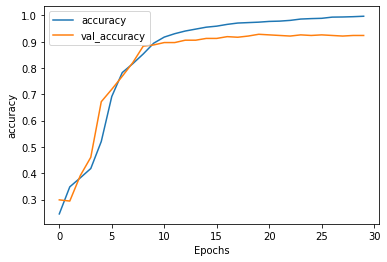

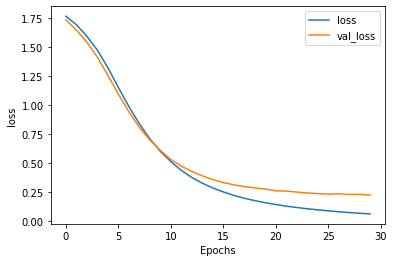

In [18]:
# Plotando

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
# Código para trocar a chave e a palavra no word_index para poder usar 
# para visualização do embedding vector

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [20]:
# Pegando pesos do Embedding

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(1000, 16)


In [21]:
# Para baixar os vetores e upar no http://projector.tensorflow.org/

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

# Cria um arquivo de METADADOS e um arquivo de VETOR
# Ambos .tsv para usar no site projector do Tensorflow

In [22]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>